# $\text{ARIMA}(p,d,q)$

ARIMA stands for Auto Regressive Integrated Moving Average. The intent of $\text{ARIMA}(p,d,q)$ is to construct a stationary, $\text{ARMA}(p,q)$</br>
time series from a non-stationary time series by differencing $d$ times. Recall that an $\text{ARMA}(p,q)$ process is defined by,

$
\begin{align}
X_t = \varepsilon_t + \sum_{i=1}^p \varphi_i X_{t-i} + \sum_{i=1}^q \vartheta_i \varepsilon_{t-i}
\end{align}
$

In terms of the lag operator $L X_t = X_{t-1}, L^2 X_t = X_{t-2}, L^3 X_t = X_{t-3}, \ldots$, The $\text{ARMA}(p,q)$ model can be written as,

$
\begin{align}
\left( 1 - \sum_{i=1}^p \varphi_i L^i \right) X_t = \left( 1  + \sum_{i=1}^q \vartheta_i L^i \right)\varepsilon_{t}
\end{align}
$

The difference operator is given by $\Delta = (1 - L)$. If $X_t$ is stationary after $d$ differences it follows that $\left( 1 - L \right)^d X_t$ is stationary. This is the definition of integration order.</br> 
Thus, $\text{ARIMA}(p,d,q)$ can be written as,

$
\begin{align}
\left( 1 - \sum_{i=1}^p \varphi_i L^i \right) \left( 1 - L \right)^d X_t = \left( 1  + \sum_{i=1}^q \vartheta_i L^i \right)\varepsilon_{t}
\end{align}
$

The procedure followed to determine the order and coefficients of an $\text{ARIMA}(p,d,q)$ series is as follows.

1. Use ADF test to determine if series is stationary. To determine $d$ difference series until ADF test fails.
2. User PACF/ACF analysis to determine $p$ and $q$.
3. Perform regression on differenced series to determine coefficients.

## Includes

In [1]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import config
from lib import (Func, Source, Est, Test, PlotType)
from lib import (stack, comparison)

# Config Plot Style
pyplot.style.use(config.glyfish_style)

/Users/troy/.pyenv/versions/gly.fish.3.9.2/lib/python3.9/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## $\text{ARIMA}(1,1,0)$ Example

In [2]:
nsample = 1000
σ = 1.0
nlags = 10

In [3]:
φ = [0.5]
d = 1
ar = Source.AR.create(φ=φ, npts=nsample)
arima = Source.ARIMA_FROM_ARMA.create(arma=ar, d=d, npts=nsample)
diff_1 = Func.DIFF.apply(arima, ndiff=1)

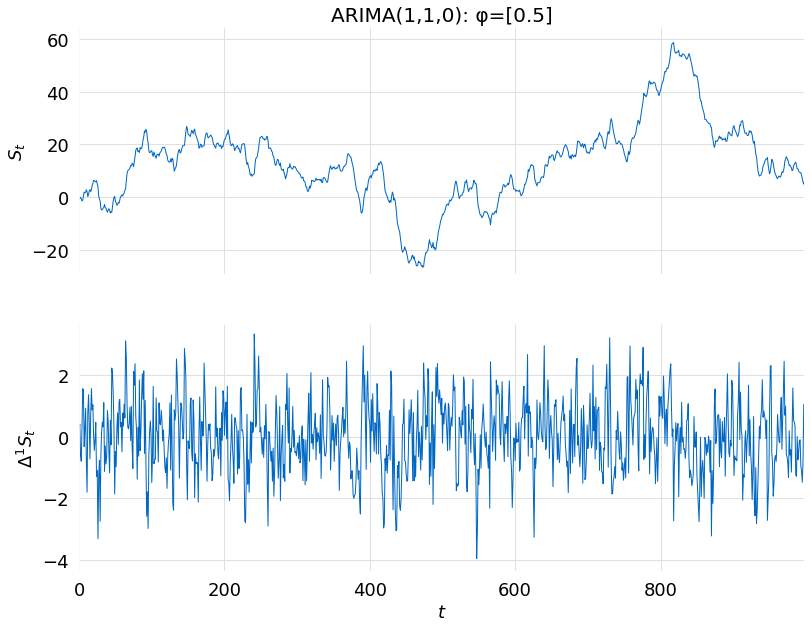

In [4]:
title=f"ARIMA(1,1,0): φ={φ}"
stack([arima, diff_1], title=title)

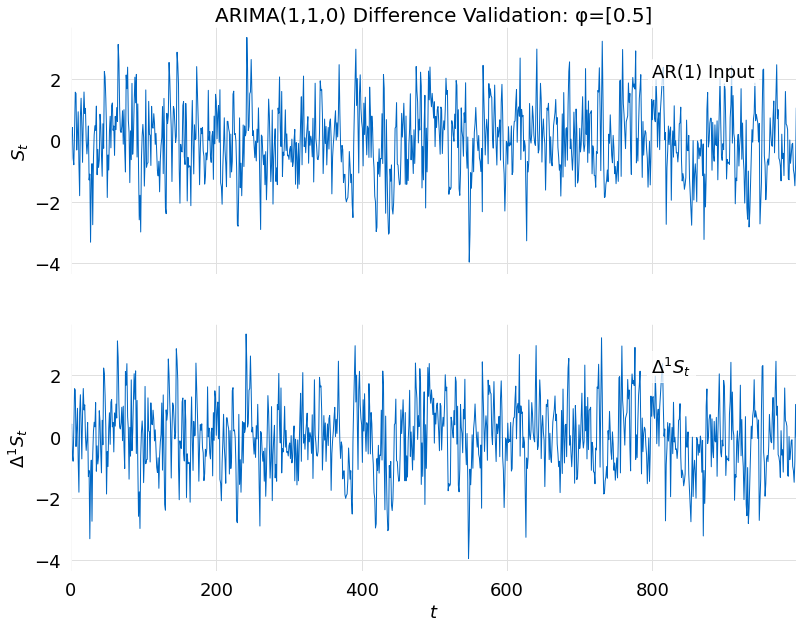

In [5]:
title = f"ARIMA(1,1,0) Difference Validation: φ={φ}"
stack([ar, diff_1], title=title, labels=[r"AR(1) Input", r"$\Delta^1 S_t$"])

In [6]:
result = Test.STATIONARITY.perform(arima)
result.summary()

╒════════════════╤════════════╕
│ Test Statistic │  -1.48876  │
├────────────────┼────────────┤
│ pvalue         │   0.127902 │
├────────────────┼────────────┤
│ Lags           │   1        │
├────────────────┼────────────┤
│ Number Obs     │ 998        │
╘════════════════╧════════════╛
╒════════════════╤══════════════════╤══════════╕
│ Significance   │   Critical Value │ Result   │
╞════════════════╪══════════════════╪══════════╡
│ 1%             │         -2.56798 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 5%             │         -1.94127 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 10%            │         -1.61656 │ Passed   │
╘════════════════╧══════════════════╧══════════╛


In [7]:
arima.attrs

{'SourceType': None,
 'SourceName': None,
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '06/06/2022 09:03:36',
 'Type': <Source.ARIMA_FROM_ARMA: 'ARIMA_FROM_ARMA'>,
 'Name': 'ARIMA(p, 1, q)-Simulation-5ee82e7c-7bdd-4a6b-aeb4-df1e3ff7646a',
 'SchemaIterations': None,
 'ARIMA_FROM_ARMA': {'npts': 1000,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'d': 1},
  'Description': 'ARIMA(1) from ARMA',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {},
  'Tests': {}}}

In [8]:
result = Test.STATIONARITY.perform(diff_1)
result.summary()

╒════════════════╤═══════════════╕
│ Test Statistic │ -18.9655      │
├────────────────┼───────────────┤
│ pvalue         │   3.47707e-29 │
├────────────────┼───────────────┤
│ Lags           │   0           │
├────────────────┼───────────────┤
│ Number Obs     │ 998           │
╘════════════════╧═══════════════╛
╒════════════════╤══════════════════╤══════════╕
│ Significance   │   Critical Value │ Result   │
╞════════════════╪══════════════════╪══════════╡
│ 1%             │         -2.56798 │ Failed   │
├────────────────┼──────────────────┼──────────┤
│ 5%             │         -1.94127 │ Failed   │
├────────────────┼──────────────────┼──────────┤
│ 10%            │         -1.61656 │ Failed   │
╘════════════════╧══════════════════╧══════════╛


In [9]:
diff_1.attrs

{'SourceType': <Source.ARIMA_FROM_ARMA: 'ARIMA_FROM_ARMA'>,
 'SourceName': 'ARIMA(p, 1, q)-Simulation-5ee82e7c-7bdd-4a6b-aeb4-df1e3ff7646a',
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '06/06/2022 09:03:36',
 'Type': <Func.DIFF: 'DIFF'>,
 'Name': 'TIME_SERIES-4461269a-dc9c-4ad2-affd-6f4aebeca35b',
 'SchemaIterations': None,
 'ARIMA_FROM_ARMA': {'npts': 1000,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'d': 1},
  'Description': 'ARIMA(1) from ARMA',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {},
  'Tests': {}},
 'DIFF': {'npts': 999,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'ndiff': 1},
  'Description': 'Difference',
  'ylabel': '$\\Delta^{1} S_t$',
  'xlabel': '$t$',
  'SourceSchema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
  'Formula': None,
  'Estimates': {},
  'Tests': {}}}

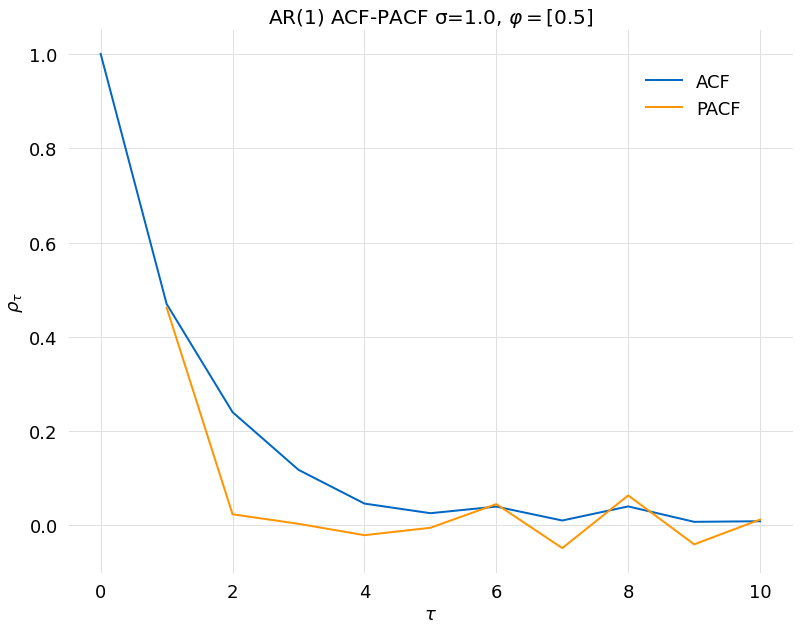

In [10]:
acf = Func.ACF.apply(diff_1, nlags=nlags)
pacf = Func.PACF.apply(diff_1, nlags=nlags)
title = f"AR(1) ACF-PACF σ={σ}, " + r"$\varphi=$"+f"{φ}"
comparison([acf, pacf], title=title, labels=["ACF", "PACF"])

In [11]:
result = Est.AR.perform(diff_1, order=1)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                  999
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1440.967
Date:                Mon, 06 Jun 2022   AIC                           2887.935
Time:                        09:03:37   BIC                           2902.655
Sample:                             0   HQIC                          2893.530
                                - 999                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0068      0.061      0.112      0.911      -0.113       0.126
ar.L1          0.4693      0.027     17.168      0.000       0.416       0.523
sigma2         1.0478      0.046     22.598      0.000       0.957       1.139
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 0.11
Prob(Q):                              0.72   Prob(JB):                         0.95
Heteroskedasticity (H):               0.94   Skew:                            -0.01
Prob(H) (two-sided):                  0.57   Kurtosis:                         3.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## $\text{ARIMA}(1,2,0)$ Example

In [12]:
φ = [0.75]
d = 2
ar = Source.AR.create(φ=φ, npts=nsample)
arima = Source.ARIMA_FROM_ARMA.create(arma=ar, d=d, npts=nsample)
diff_1 = Func.DIFF.apply(arima, ndiff=1)
diff_2 = Func.DIFF.apply(arima, ndiff=2)

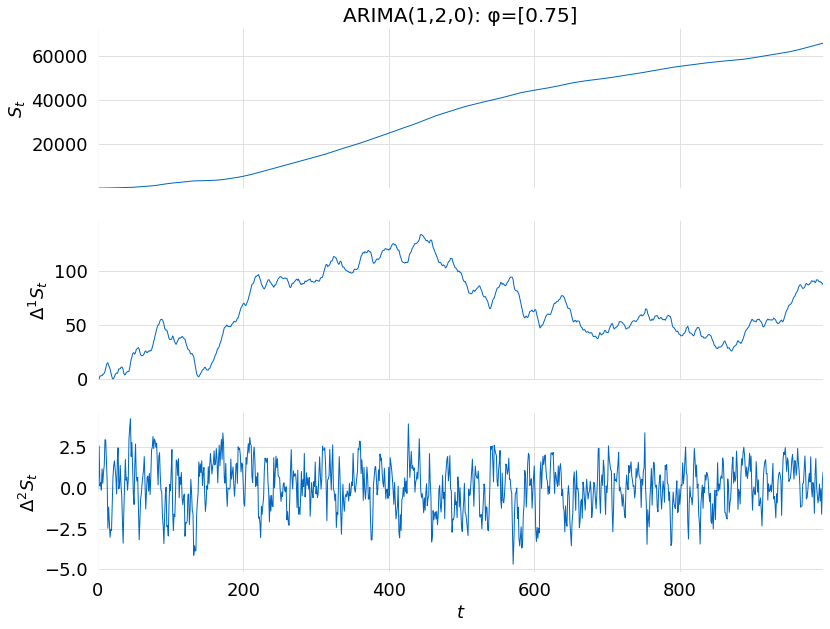

In [13]:
title = f"ARIMA(1,2,0): φ={φ}"
stack([arima, diff_1, diff_2], title=title)

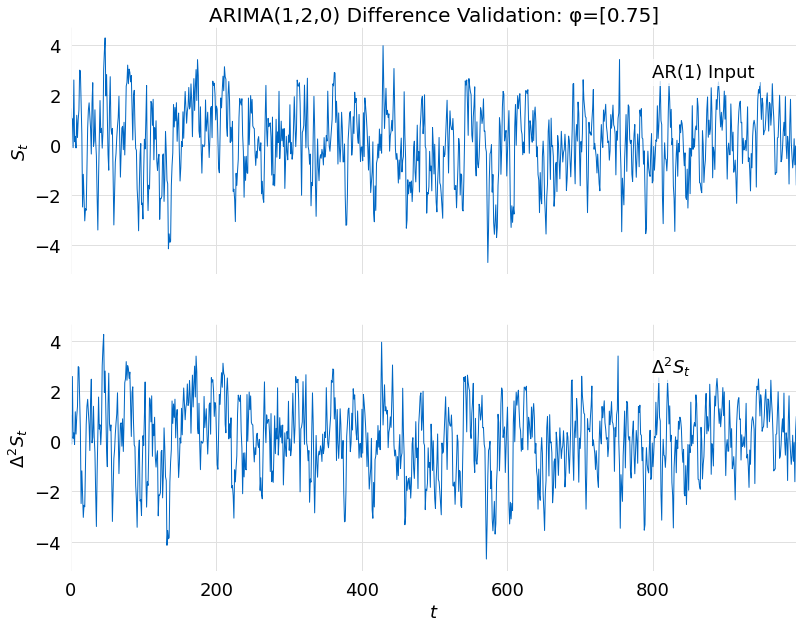

In [14]:
title = f"ARIMA(1,2,0) Difference Validation: φ={φ}"
stack([ar, diff_2], title=title, labels=[r"AR(1) Input", r"$\Delta^2 S_t$"])

In [15]:
result = Test.STATIONARITY.perform(arima)
result.summary()

╒════════════════╤════════════╕
│ Test Statistic │   0.396773 │
├────────────────┼────────────┤
│ pvalue         │   0.800094 │
├────────────────┼────────────┤
│ Lags           │   3        │
├────────────────┼────────────┤
│ Number Obs     │ 996        │
╘════════════════╧════════════╛
╒════════════════╤══════════════════╤══════════╕
│ Significance   │   Critical Value │ Result   │
╞════════════════╪══════════════════╪══════════╡
│ 1%             │         -2.56799 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 5%             │         -1.94127 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 10%            │         -1.61656 │ Passed   │
╘════════════════╧══════════════════╧══════════╛


In [16]:
arima.attrs

{'SourceType': None,
 'SourceName': None,
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '06/06/2022 09:03:37',
 'Type': <Source.ARIMA_FROM_ARMA: 'ARIMA_FROM_ARMA'>,
 'Name': 'ARIMA(p, 2, q)-Simulation-27a8e5e4-a2eb-44ee-978b-fce7aa3e6d62',
 'SchemaIterations': None,
 'ARIMA_FROM_ARMA': {'npts': 1000,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'d': 2},
  'Description': 'ARIMA(2) from ARMA',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {},
  'Tests': {}}}

In [17]:
result = Test.STATIONARITY.perform(diff_1)
result.summary()

╒════════════════╤════════════╕
│ Test Statistic │  -0.139972 │
├────────────────┼────────────┤
│ pvalue         │   0.635811 │
├────────────────┼────────────┤
│ Lags           │   2        │
├────────────────┼────────────┤
│ Number Obs     │ 996        │
╘════════════════╧════════════╛
╒════════════════╤══════════════════╤══════════╕
│ Significance   │   Critical Value │ Result   │
╞════════════════╪══════════════════╪══════════╡
│ 1%             │         -2.56799 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 5%             │         -1.94127 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 10%            │         -1.61656 │ Passed   │
╘════════════════╧══════════════════╧══════════╛


In [18]:
diff_1.attrs

{'SourceType': <Source.ARIMA_FROM_ARMA: 'ARIMA_FROM_ARMA'>,
 'SourceName': 'ARIMA(p, 2, q)-Simulation-27a8e5e4-a2eb-44ee-978b-fce7aa3e6d62',
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '06/06/2022 09:03:37',
 'Type': <Func.DIFF: 'DIFF'>,
 'Name': 'TIME_SERIES-69e8a556-0469-4067-bc64-6fe64aa6d1d0',
 'SchemaIterations': None,
 'ARIMA_FROM_ARMA': {'npts': 1000,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'d': 2},
  'Description': 'ARIMA(2) from ARMA',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {},
  'Tests': {}},
 'DIFF': {'npts': 999,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'ndiff': 1},
  'Description': 'Difference',
  'ylabel': '$\\Delta^{1} S_t$',
  'xlabel': '$t$',
  'SourceSchema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
  'Formula': None,
  'Estimates': {},
  'Tests': {}}}

In [19]:
result = Test.STATIONARITY.perform(diff_2)
result.summary()

╒════════════════╤═══════════════╕
│ Test Statistic │ -13.6495      │
├────────────────┼───────────────┤
│ pvalue         │   9.25623e-25 │
├────────────────┼───────────────┤
│ Lags           │   0           │
├────────────────┼───────────────┤
│ Number Obs     │ 997           │
╘════════════════╧═══════════════╛
╒════════════════╤══════════════════╤══════════╕
│ Significance   │   Critical Value │ Result   │
╞════════════════╪══════════════════╪══════════╡
│ 1%             │         -2.56799 │ Failed   │
├────────────────┼──────────────────┼──────────┤
│ 5%             │         -1.94127 │ Failed   │
├────────────────┼──────────────────┼──────────┤
│ 10%            │         -1.61656 │ Failed   │
╘════════════════╧══════════════════╧══════════╛


In [20]:
diff_2.attrs

{'SourceType': <Source.ARIMA_FROM_ARMA: 'ARIMA_FROM_ARMA'>,
 'SourceName': 'ARIMA(p, 2, q)-Simulation-27a8e5e4-a2eb-44ee-978b-fce7aa3e6d62',
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '06/06/2022 09:03:37',
 'Type': <Func.DIFF: 'DIFF'>,
 'Name': 'TIME_SERIES-6ef04d2c-6498-4dd2-be2f-4d1a8ba91c96',
 'SchemaIterations': None,
 'ARIMA_FROM_ARMA': {'npts': 1000,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'d': 2},
  'Description': 'ARIMA(2) from ARMA',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {},
  'Tests': {}},
 'DIFF': {'npts': 998,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'ndiff': 2},
  'Description': 'Difference',
  'ylabel': '$\\Delta^{2} S_t$',
  'xlabel': '$t$',
  'SourceSchema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
  'Formula': None,
  'Estimates': {},
  'Tests': {}}}

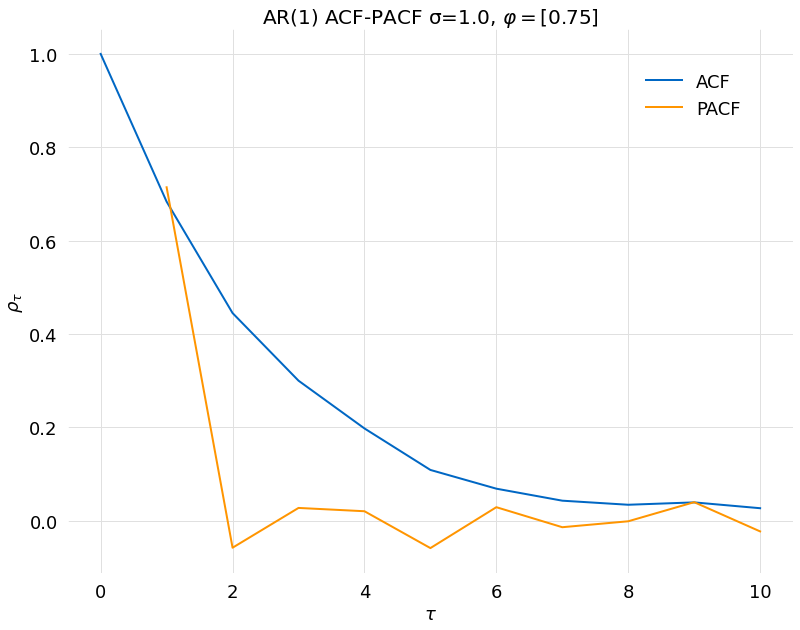

In [21]:
acf = Func.ACF.apply(diff_2, nlags=nlags)
pacf = Func.PACF.apply(diff_2, nlags=nlags)
title = f"AR(1) ACF-PACF σ={σ}, " + r"$\varphi=$"+f"{φ}"
comparison([acf, pacf], title=title, labels=["ACF", "PACF"])

In [22]:
result = Est.AR.perform(diff_2, order=1)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                  998
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1471.979
Date:                Mon, 06 Jun 2022   AIC                           2949.959
Time:                        09:03:38   BIC                           2964.676
Sample:                             0   HQIC                          2955.553
                                - 998                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0935      0.107      0.874      0.382      -0.116       0.303
ar.L1          0.6833      0.024     28.957      0.000       0.637       0.730
sigma2         1.1178      0.054     20.752      0.000       1.012       1.223
===================================================================================
Ljung-Box (L1) (Q):                   0.87   Jarque-Bera (JB):                 8.90
Prob(Q):                              0.35   Prob(JB):                         0.01
Heteroskedasticity (H):               0.77   Skew:                            -0.20
Prob(H) (two-sided):                  0.02   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## $\text{ARIMA}(2,2,0)$ Example

In [23]:
φ = [0.25, 0.4]
d = 2
ar = Source.AR.create(φ=φ, npts=nsample)
arima = Source.ARIMA_FROM_ARMA.create(arma=ar, d=d, npts=nsample)
diff_1 = Func.DIFF.apply(arima, ndiff=1)
diff_2 = Func.DIFF.apply(arima, ndiff=2)

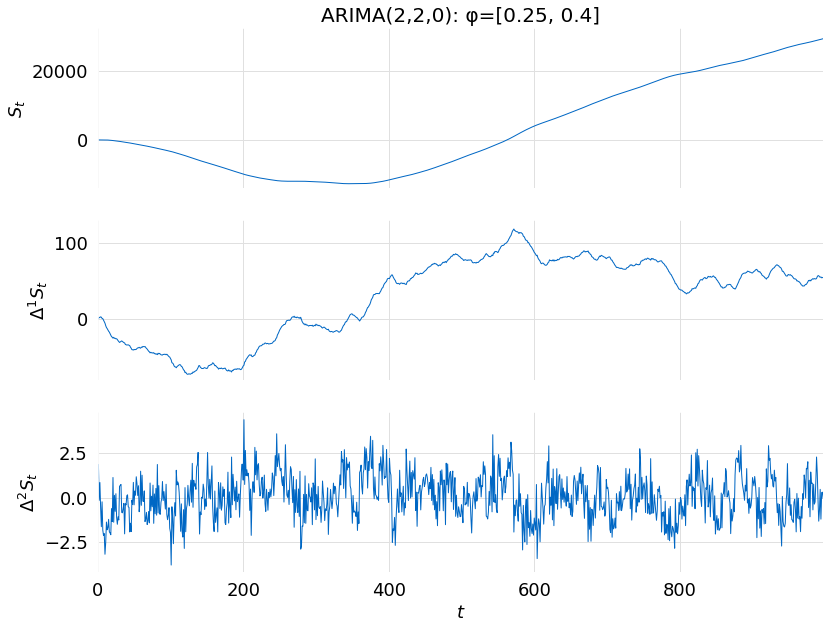

In [24]:
title = f"ARIMA(2,2,0): φ={φ}"
stack([arima, diff_1, diff_2], title=title)

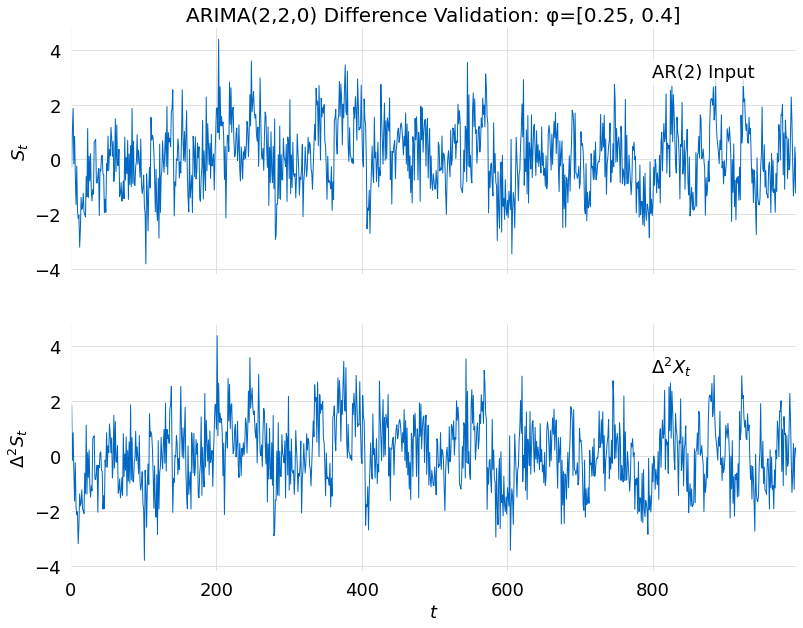

In [25]:
title = f"ARIMA(2,2,0) Difference Validation: φ={φ}"
stack([ar, diff_2], title=title, labels=[r"AR(2) Input", r"$\Delta^2 X_t$"])

In [26]:
result = Test.STATIONARITY.perform(arima)
result.summary()

╒════════════════╤════════════╕
│ Test Statistic │  -1.35346  │
├────────────────┼────────────┤
│ pvalue         │   0.163201 │
├────────────────┼────────────┤
│ Lags           │   4        │
├────────────────┼────────────┤
│ Number Obs     │ 995        │
╘════════════════╧════════════╛
╒════════════════╤══════════════════╤══════════╕
│ Significance   │   Critical Value │ Result   │
╞════════════════╪══════════════════╪══════════╡
│ 1%             │         -2.56799 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 5%             │         -1.94127 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 10%            │         -1.61656 │ Passed   │
╘════════════════╧══════════════════╧══════════╛


In [27]:
arima.attrs

{'SourceType': None,
 'SourceName': None,
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '06/06/2022 09:03:38',
 'Type': <Source.ARIMA_FROM_ARMA: 'ARIMA_FROM_ARMA'>,
 'Name': 'ARIMA(p, 2, q)-Simulation-66d7c6b2-c068-48fb-aa56-699f7dd79fe5',
 'SchemaIterations': None,
 'ARIMA_FROM_ARMA': {'npts': 1000,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'d': 2},
  'Description': 'ARIMA(2) from ARMA',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {},
  'Tests': {}}}

In [28]:
result = Test.STATIONARITY.perform(diff_1)
result.summary()

╒════════════════╤════════════╕
│ Test Statistic │  -0.614017 │
├────────────────┼────────────┤
│ pvalue         │   0.448759 │
├────────────────┼────────────┤
│ Lags           │   3        │
├────────────────┼────────────┤
│ Number Obs     │ 995        │
╘════════════════╧════════════╛
╒════════════════╤══════════════════╤══════════╕
│ Significance   │   Critical Value │ Result   │
╞════════════════╪══════════════════╪══════════╡
│ 1%             │         -2.56799 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 5%             │         -1.94127 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 10%            │         -1.61656 │ Passed   │
╘════════════════╧══════════════════╧══════════╛


In [29]:
diff_1.attrs

{'SourceType': <Source.ARIMA_FROM_ARMA: 'ARIMA_FROM_ARMA'>,
 'SourceName': 'ARIMA(p, 2, q)-Simulation-66d7c6b2-c068-48fb-aa56-699f7dd79fe5',
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '06/06/2022 09:03:38',
 'Type': <Func.DIFF: 'DIFF'>,
 'Name': 'TIME_SERIES-72f8a0b5-b469-494d-8abc-3760e45c2b45',
 'SchemaIterations': None,
 'ARIMA_FROM_ARMA': {'npts': 1000,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'d': 2},
  'Description': 'ARIMA(2) from ARMA',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {},
  'Tests': {}},
 'DIFF': {'npts': 999,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'ndiff': 1},
  'Description': 'Difference',
  'ylabel': '$\\Delta^{1} S_t$',
  'xlabel': '$t$',
  'SourceSchema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
  'Formula': None,
  'Estimates': {},
  'Tests': {}}}

In [30]:
result = Test.STATIONARITY.perform(diff_2)
result.summary()

╒════════════════╤═══════════════╕
│ Test Statistic │  -9.51119     │
├────────────────┼───────────────┤
│ pvalue         │   1.21326e-16 │
├────────────────┼───────────────┤
│ Lags           │   2           │
├────────────────┼───────────────┤
│ Number Obs     │ 995           │
╘════════════════╧═══════════════╛
╒════════════════╤══════════════════╤══════════╕
│ Significance   │   Critical Value │ Result   │
╞════════════════╪══════════════════╪══════════╡
│ 1%             │         -2.56799 │ Failed   │
├────────────────┼──────────────────┼──────────┤
│ 5%             │         -1.94127 │ Failed   │
├────────────────┼──────────────────┼──────────┤
│ 10%            │         -1.61656 │ Failed   │
╘════════════════╧══════════════════╧══════════╛


In [31]:
diff_2.attrs

{'SourceType': <Source.ARIMA_FROM_ARMA: 'ARIMA_FROM_ARMA'>,
 'SourceName': 'ARIMA(p, 2, q)-Simulation-66d7c6b2-c068-48fb-aa56-699f7dd79fe5',
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '06/06/2022 09:03:38',
 'Type': <Func.DIFF: 'DIFF'>,
 'Name': 'TIME_SERIES-a1be9dcf-ad79-46da-8304-17199f744668',
 'SchemaIterations': None,
 'ARIMA_FROM_ARMA': {'npts': 1000,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'d': 2},
  'Description': 'ARIMA(2) from ARMA',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {},
  'Tests': {}},
 'DIFF': {'npts': 998,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'ndiff': 2},
  'Description': 'Difference',
  'ylabel': '$\\Delta^{2} S_t$',
  'xlabel': '$t$',
  'SourceSchema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
  'Formula': None,
  'Estimates': {},
  'Tests': {}}}

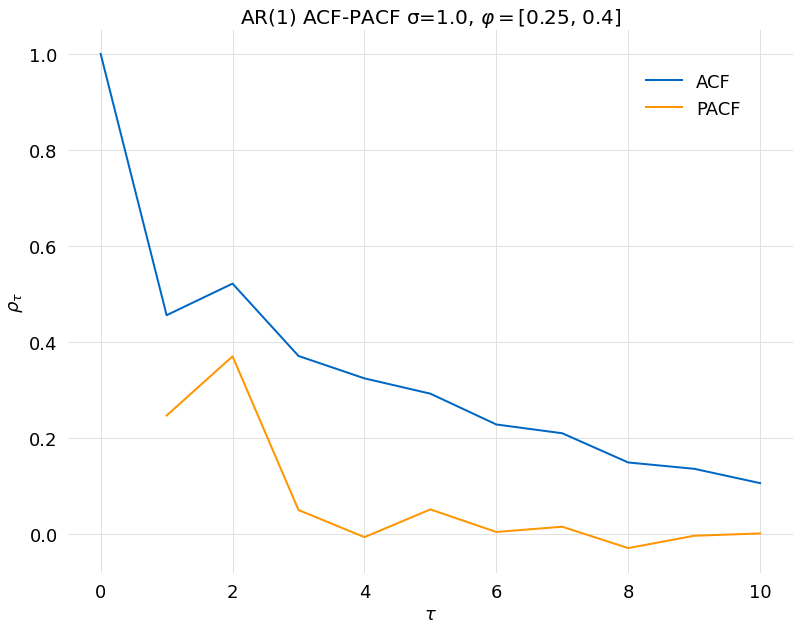

In [32]:
acf = Func.ACF.apply(diff_2, nlags=nlags)
pacf = Func.PACF.apply(diff_2, nlags=nlags)
title = f"AR(1) ACF-PACF σ={σ}, " + r"$\varphi=$"+f"{φ}"
comparison([acf, pacf], title=title, labels=["ACF", "PACF"])

In [33]:
result = Est.AR.perform(diff_2, order=2)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                  998
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1421.844
Date:                Mon, 06 Jun 2022   AIC                           2851.688
Time:                        09:03:39   BIC                           2871.311
Sample:                             0   HQIC                          2859.147
                                - 998                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0605      0.097      0.624      0.533      -0.130       0.251
ar.L1          0.2751      0.029      9.562      0.000       0.219       0.332
ar.L2          0.3969      0.029     13.705      0.000       0.340       0.454
sigma2         1.0110      0.045     22.526      0.000       0.923       1.099
===================================================================================
Ljung-Box (L1) (Q):                   0.77   Jarque-Bera (JB):                 0.97
Prob(Q):                              0.38   Prob(JB):                         0.61
Heteroskedasticity (H):               0.90   Skew:                             0.07
Prob(H) (two-sided):                  0.36   Kurtosis:                         3.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""